# Assignment 2

### MACS 30000, Dr. Evans
### Ruixi Li

Due Wednesday, Oct. 17 at 11:30 AM

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# plt.style.use('seaborn')
import seaborn as sns

#Turn of Notebook Package Warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Imputing age and gender

#### (a) 
For the age, I will use variables total income and weight in SurveyIncome.txt to fit a linear regression model. Then, I will use weight and the sum of labor income and capital income in BestIncome.txt to predict age into the BestIncome.txt.

For the gender, I will use variables total income and weight in SurveyIncome.txt to fit a logit model. Then, I will use weight and the sum of labor income and capital income in BestIncome.txt to predict age into the BestIncome.txt.

In [2]:
# read in my data of BestIncome.txt
BestIncome = pd.read_csv("BestIncome.txt", header=None)
BestIncome.head()

,0,1,2,3
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [3]:
# name my variables of BestIncome.txt
BestIncome_cols = ['lab_inc','cap_inc','hgt','wgt']
BestIncome.columns = BestIncome_cols
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt
0,52655.605507,9279.509829,64.568138,152.920634
1,70586.979225,9451.016902,65.727648,159.534414
2,53738.008339,8078.132315,66.268796,152.502405
3,55128.180903,12692.670403,62.910559,149.218189
4,44482.794867,9812.975746,68.678295,152.726358


In [4]:
# run descriptive statistics of BestIncome.txt
BestIncome.describe()

,lab_inc,cap_inc,hgt,wgt
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,57052.925133,9985.798563,65.014021,150.006011
std,8036.544363,2010.123691,1.999692,9.973001
min,22917.607900,1495.191896,58.176154,114.510700
25%,51624.339880,8611.756679,63.652971,143.341979
50%,56968.709935,9969.840117,65.003557,149.947641
75%,62408.232277,11339.905773,66.356915,156.724586
max,90059.898537,19882.320069,72.802277,185.408280


In [5]:
# read in my data of SurveyIncome.txt
SurveyIncome = pd.read_csv("SurveyIncome.txt", header=None)
SurveyIncome.head()

,0,1,2,3
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [6]:
# name my variables of SurveyIncome.txt
SurveyIncome_cols = ['tot_inc','wgt','age','female']
SurveyIncome.columns = SurveyIncome_cols
SurveyIncome.head()

,tot_inc,wgt,age,female
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


In [7]:
# run descriptive statistics of SurveyIncome.txt
SurveyIncome.describe()

,tot_inc,wgt,age,female
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,64871.210860,149.542181,44.839320,0.50000
std,9542.444214,22.028883,5.939185,0.50025
min,31816.281649,99.662468,25.741333,0.00000
25%,58349.862384,130.179235,41.025231,0.00000
50%,65281.271149,149.758434,44.955981,0.50000
75%,71749.038000,170.147337,48.817644,1.00000
max,92556.135462,196.503274,66.534646,1.00000


#### (b) 
Here is where I'll use my proposed method from part (a) to impute age.

In [8]:
# Define Outcome and Independent Variables
outcome = 'age'
features = ['tot_inc','wgt']

X,y = SurveyIncome[features], SurveyIncome[outcome]

In [9]:
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [10]:
y.head()

0    46.610021
1    48.791349
2    48.429894
3    41.543926
4    41.201245
Name: age, dtype: float64

In [11]:
# run regression

X = sm.add_constant(X, prepend=False)

m = sm.OLS(y, X)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6326
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.531
Time:                        22:17:46   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc      2.52e-05   2.26e-05      1.114      0.2

I obtained the following linear regression equation:
$$age = 44.2097 + 0.0000252 tot\underline{ }inc - 0.0067wgt$$

Then, I will predict age in BestIncome.txt:

In [12]:
# get total income by adding labor income and capital income toghether
BestIncome['tot_inc'] = BestIncome['lab_inc'] + BestIncome['cap_inc']

In [13]:
# predit age
X = BestIncome[features]
X = sm.add_constant(X, prepend = False)
BestIncome['age'] = res.predict(X)
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,age
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.742614
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.154387
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.742427
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.915836
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.551391


Here is where I'll use my proposed method from part (a) to impute gender.

In [14]:
# Define Outcome and Independent Variables
outcome = 'female'
features = ['tot_inc','wgt']

X,y = SurveyIncome[features], SurveyIncome[outcome]

In [15]:
X.head()

,tot_inc,wgt
0,63642.513655,134.998269
1,49177.380692,134.392957
2,67833.339128,126.482992
3,62962.266217,128.038121
4,58716.952597,126.211980


In [16]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: female, dtype: float64

In [17]:
# run regression

X = sm.add_constant(X, prepend=False)

m = sm.Logit(y, X)

res = m.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 female   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        22:17:46   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tot_inc       -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
wgt           -0.4460      0

I obtained the following logit regression equation:
$$logit(female) = 76.7929 - 0.0002 \times tot\underline{ }inc - 0.4460 \times wgt$$

Then, I will predict gender in BestIncome.txt:

In [18]:
# predict gender
X = BestIncome[features]
X = sm.add_constant(X, prepend = False)
BestIncome['gender'] = res.predict(X)
BestIncome['gender'][BestIncome['gender'] >= 0.5] = 1
BestIncome['gender'][BestIncome['gender'] < 0.5] = 0
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,tot_inc,age,gender
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.742614,0.0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.154387,0.0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.742427,0.0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.915836,0.0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.551391,1.0


In [19]:
# drop total income in BestIncome.txt and obtain the final result
BestIncome = BestIncome.drop(columns = "tot_inc")
BestIncome.head()

,lab_inc,cap_inc,hgt,wgt,age,gender
0,52655.605507,9279.509829,64.568138,152.920634,44.742614,0.0
1,70586.979225,9451.016902,65.727648,159.534414,45.154387,0.0
2,53738.008339,8078.132315,66.268796,152.502405,44.742427,0.0
3,55128.180903,12692.670403,62.910559,149.218189,44.915836,0.0
4,44482.794867,9812.975746,68.678295,152.726358,44.551391,1.0


#### (c) 
Here is where I'll report the descriptive statistics for my new imputed variables.

In [20]:
# select age and gender from BestIncome.txt
Imputed = BestIncome[['age', 'gender']]
Imputed.head()

,age,gender
0,44.742614,0.0
1,45.154387,0.0
2,44.742427,0.0
3,44.915836,0.0
4,44.551391,1.0


In [21]:
# descriptive statistics of imputed variables
Imputed.describe()

,age,gender
count,10000.000000,10000.000000
mean,44.890828,0.454600
std,0.219150,0.497959
min,43.976495,0.000000
25%,44.743776,0.000000
50%,44.886944,0.000000
75%,45.038991,1.000000
max,45.703819,1.000000


#### (d) 
Correlation matrix for the now six variables

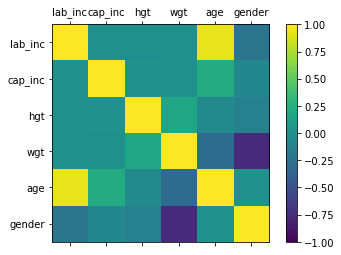

In [22]:
# Correlation Matrix Plot

def corr_plot(df):    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    

corr_plot(BestIncome)

In [23]:
# In Matrix Form
corr = BestIncome.corr()
corr.style.background_gradient()

,lab_inc,cap_inc,hgt,wgt,age,gender
lab_inc,1,0.0053253,0.00278978,0.00450691,0.924053,-0.215469
cap_inc,0.0053253,1,0.0215716,0.00629868,0.234159,-0.0625691
hgt,0.00278978,0.0215716,1,0.172103,-0.0450828,-0.127416
wgt,0.00450691,0.00629868,0.172103,1,-0.300288,-0.763821
age,0.924053,0.234159,-0.0450828,-0.300288,1,0.0200595
gender,-0.215469,-0.0625691,-0.127416,-0.763821,0.0200595,1


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [24]:
# Read in my third data set
IncomeIntel = pd.read_csv('IncomeIntel.txt', header=None)
# Report coefficients and SE's

In [25]:
# Name my variables
IncomeIntel_col = ['grad_year','gre_qnt','salary_p4']
IncomeIntel.columns = IncomeIntel_col
IncomeIntel.head()

,grad_year,gre_qnt,salary_p4
0,2001.0,719.335812,67985.207551
1,2001.0,717.867044,53632.218539
2,2001.0,765.430196,68951.364320
3,2001.0,737.845450,71942.003515
4,2001.0,715.781826,61322.132663


In [26]:
# Run regression model
outcome = 'salary_p4'
features = ['gre_qnt']

X, y = IncomeIntel[features], IncomeIntel[outcome]

In [27]:
X.head()

,gre_qnt
0,719.335812
1,717.867044
2,765.430196
3,737.845450
4,715.781826


In [28]:
y.head()

0    67985.207551
1    53632.218539
2    68951.364320
3    71942.003515
4    61322.132663
Name: salary_p4, dtype: float64

In [29]:
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.277
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.132
Time:                        22:17:47   Log-Likelihood:                -10507.
No. Observations:                1000   AIC:                         2.102e+04
Df Residuals:                     998   BIC:                         2.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gre_qnt        1.7423      1.154      1.509      0.1

I obtained the following OLS regression equation:
$$salary\underline{ }p4 = 59020 + 1.7423gre\underline{ }qnt$$

and estimated coefficients and standard errors are:

$$\beta_0 = 59020 \ \ \ SE(\beta_0) = 744.576$$

$$\beta_1 = 1.7423 \ \ \ SE(\beta_1) = 1.154$$

#### (b) Create a scatterplot of GRE score and graduation year. 

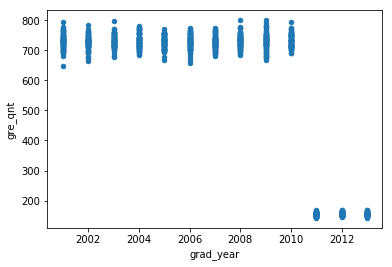

In [30]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
gre_qnt = IncomeIntel['gre_qnt']
IncomeIntel.plot(x='grad_year', y='gre_qnt', kind='scatter')
plt.show()

As we can seen from the scatterplot above and the exercise, GRE quantitative scoring scale changed in 2011. My proposed solution is to convert two ways of scaling into one.

In [31]:
# Convert two scaling methods into one by zscore each gre_qnt
from scipy import stats
from scipy.stats import zscore
df1 = IncomeIntel.loc[IncomeIntel['grad_year'] > 2010]
df2 = IncomeIntel.loc[IncomeIntel['grad_year'] <= 2010]
df1['new_gre_qnt'] = zscore(df1['gre_qnt'])
df2['new_gre_qnt'] = zscore(df2['gre_qnt'])
IncomeIntel = pd.concat([df1,df2])
IncomeIntel.describe()

,grad_year,gre_qnt,salary_p4,new_gre_qnt
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2006.994000,597.575531,60056.416911,1.838363e-15
std,3.740582,242.708975,8862.102555,1.000500e+00
min,2001.000000,141.927335,30792.536489,-3.628779e+00
25%,2004.000000,683.954704,54401.401189,-6.354818e-01
50%,2007.000000,721.322021,59875.904918,-3.903214e-03
75%,2010.000000,738.221236,66177.632400,6.176511e-01
max,2013.000000,800.000000,92552.027272,3.132870e+00


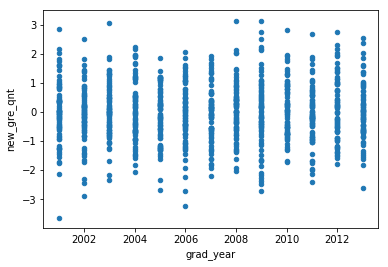

In [32]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
gre_qnt = IncomeIntel['new_gre_qnt']
IncomeIntel.plot(x='grad_year', y='new_gre_qnt', kind='scatter')
plt.show()

#### (c) Create a scatterplot of income and graduation year

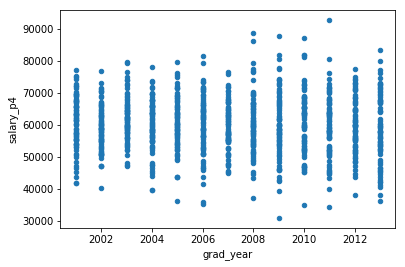

In [33]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
salary_p4 = IncomeIntel['salary_p4']
IncomeIntel.plot(x='grad_year', y='salary_p4', kind='scatter')
plt.show()

According to the scatterplot above, there exists outliers in year 2008 and 2011 which is far from the cloud center. In addition, the standard deviation of salary_p4 is too large. To address this problem, I will drop salary_p4 which lays out of 2 standard deviation and normalize salary_p4.

In [34]:
#  Code to implement a solution
IncomeIntel = IncomeIntel[(np.abs(zscore(IncomeIntel)) < 2).all(axis=1)] # remove outliers outside 2 std
IncomeIntel['new_salary_p4'] = zscore(IncomeIntel.salary_p4) # normalize salary_p4
IncomeIntel.describe()

,grad_year,gre_qnt,salary_p4,new_gre_qnt,new_salary_p4
count,908.000000,908.000000,908.000000,908.000000,9.080000e+02
mean,2006.936123,597.907798,60075.671645,-0.017766,6.932780e-17
std,3.745824,242.184506,7762.410669,0.852118,1.000551e+00
min,2001.000000,145.276415,42513.915172,-1.946080,-2.263657e+00
25%,2004.000000,693.372062,54737.061149,-0.622454,-6.881306e-01
50%,2007.000000,721.656271,59914.863740,-0.036361,-2.072765e-02
75%,2010.000000,737.817520,65918.129079,0.548924,7.530750e-01
max,2013.000000,773.687811,77767.377120,1.960557,2.280407e+00


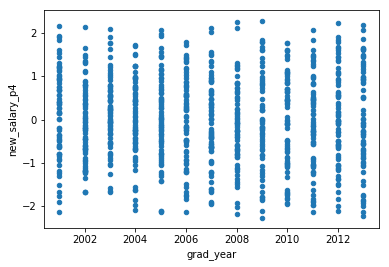

In [35]:
# Code and output of scatterplot
grad_year = IncomeIntel['grad_year']
new_salary_p4 = IncomeIntel['new_salary_p4']
IncomeIntel.plot(x='grad_year', y='new_salary_p4', kind='scatter')
plt.show()

#### (d) Re-estimate coefficients with updated variables.

In [36]:
# Code to re-estimate, output of new coefficients
outcome = ['new_salary_p4']
features = ['new_gre_qnt']

X, y = IncomeIntel[features], IncomeIntel[outcome]

In [37]:
X = sm.add_constant(X, prepend=False)
m = sm.OLS(y, X)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          new_salary_p4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2589
Date:                Sun, 14 Oct 2018   Prob (F-statistic):              0.611
Time:                        22:17:48   Log-Likelihood:                -1288.3
No. Observations:                 908   AIC:                             2581.
Df Residuals:                     906   BIC:                             2590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
new_gre_qnt     0.0198      0.039      0.509      

I obtained the following OLS regression equation:
$$new\underline{ }salary\underline{ }p4 = 0.0006 + 0.0171new\underline{ }gre\underline{ }qnt$$

and estimated coefficients and standard errors are:

$$\beta_0 = 0.0006 \ \ \ SE(\beta_0) = 0.034$$

$$\beta_1 = 0.0171 \ \ \ SE(\beta_1) = 0.043$$

Because I normalized both salary_p4 and gre_qnt, so the interpretation is different from the foremer one in scale. For the slope estimator, the salary after 4 years increased 0.0171 standard error with each addition of 1 standard error in GRE quantitative score. If GRE quantitative score is 0, salary after 4 years is 0.0006 dollars, which is unrealistic. So it is over extapolation of intercept estimator.


### 3. Assessment of Kossinets and Watts.

See the attached PDF.